In [1]:
import os
from pathlib import Path
from operator import itemgetter
import pickle
import pydicom
from time import time

import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, MultiPolygon, LineString, GeometryCollection, Point, MultiPoint
from shapely.affinity import translate

from catch_converter.parse_contours import parse_cvi42ws
import CATCH_utils
from Mini_LL import *

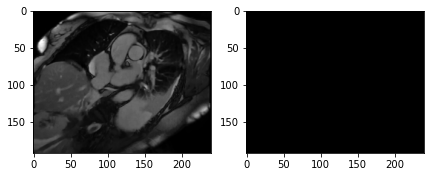

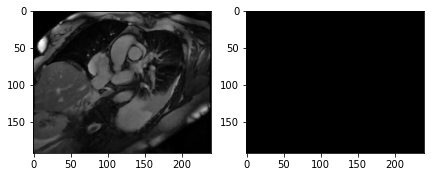

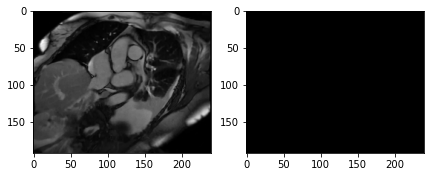

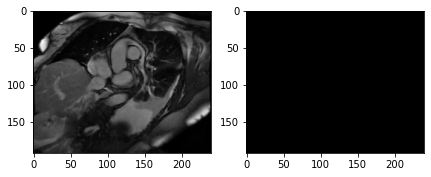

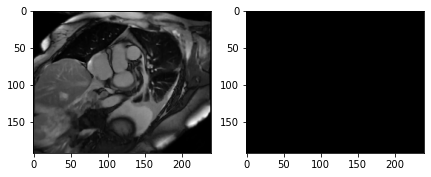

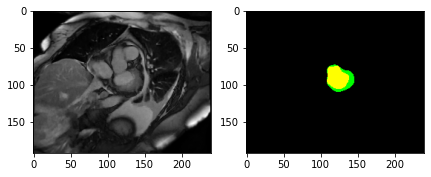

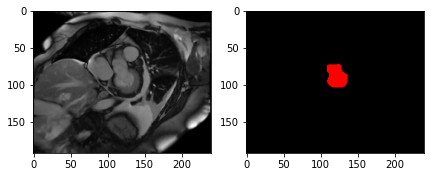

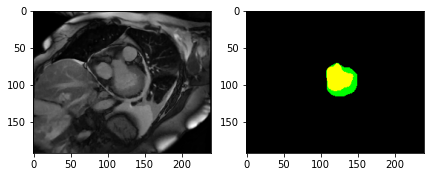

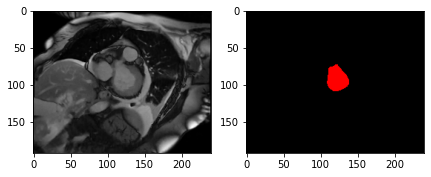

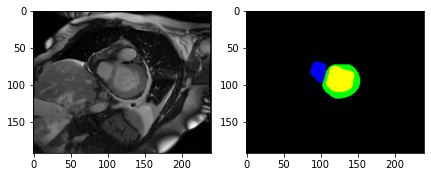

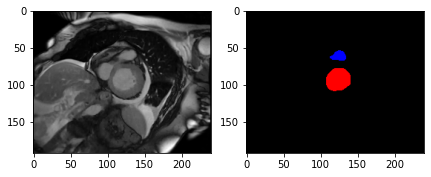

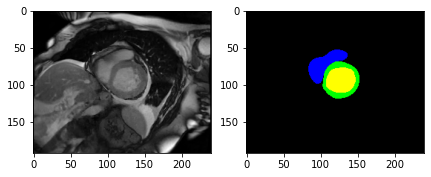

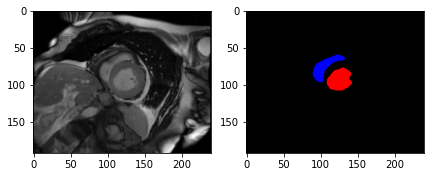

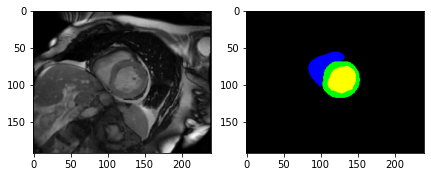

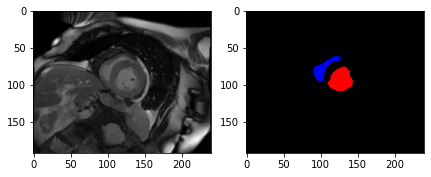

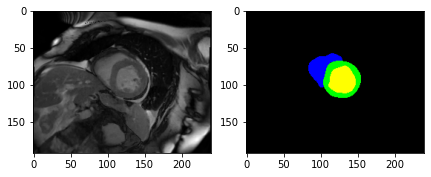

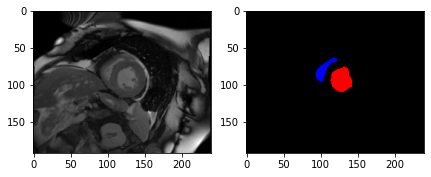

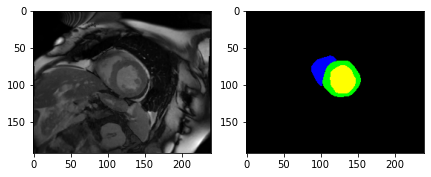

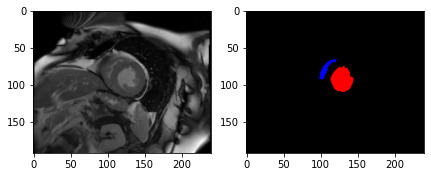

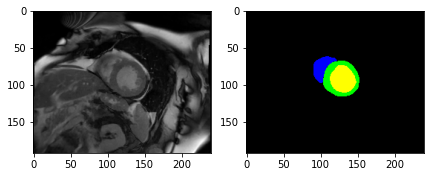

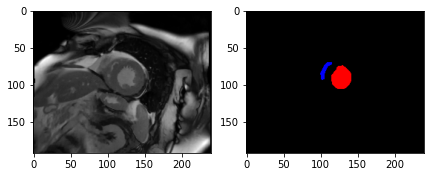

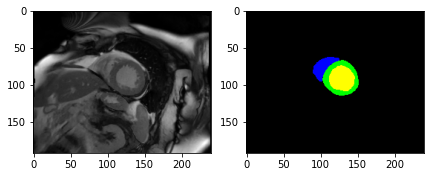

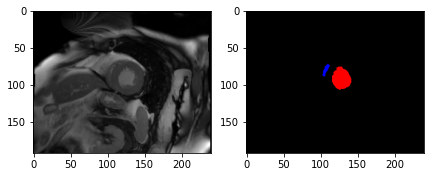

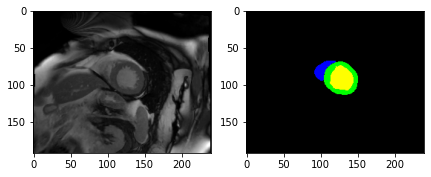

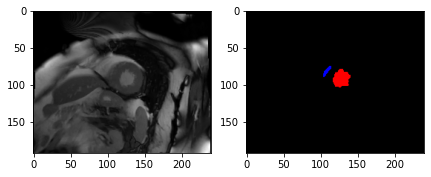

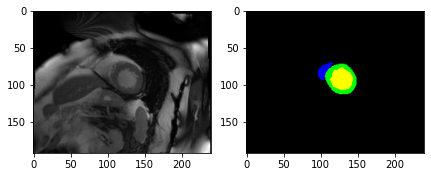

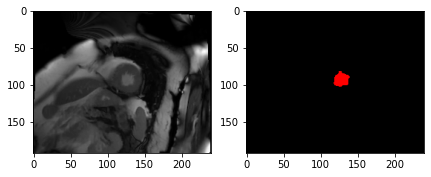

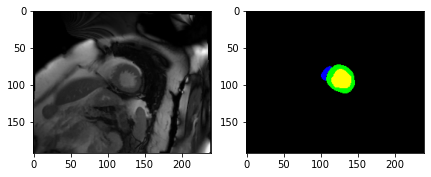

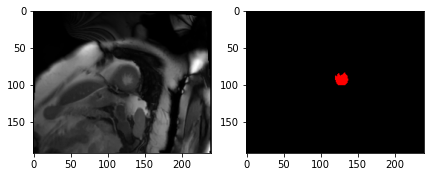

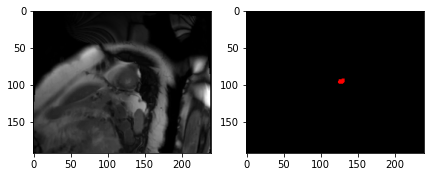

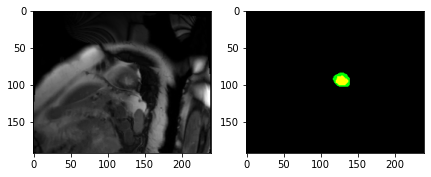

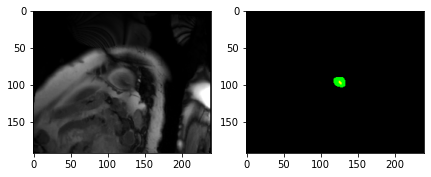

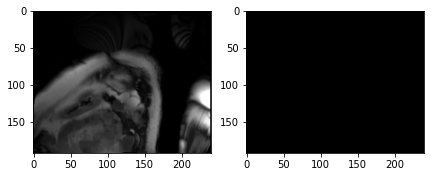

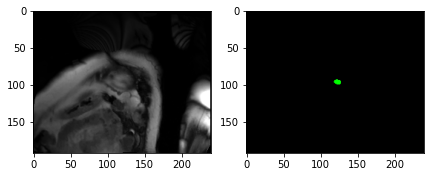

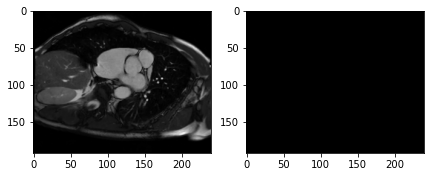

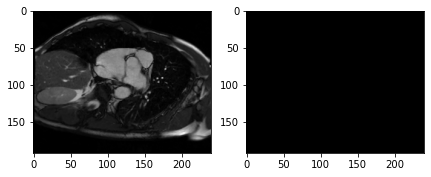

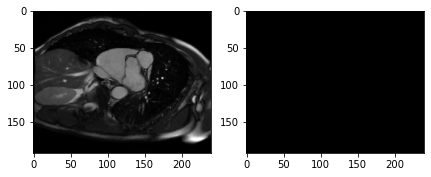

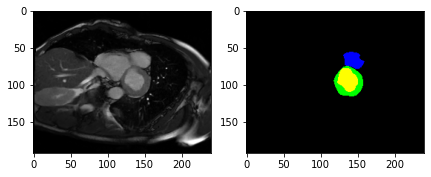

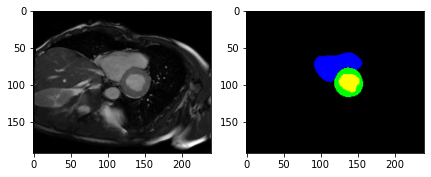

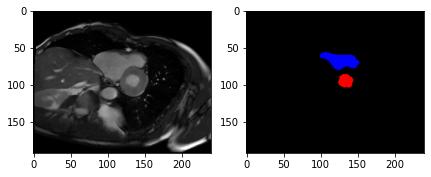

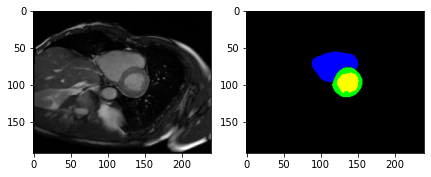

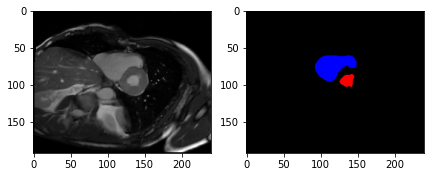

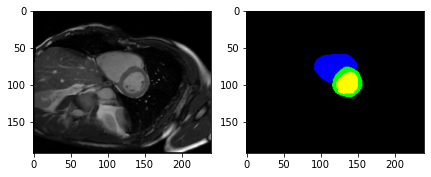

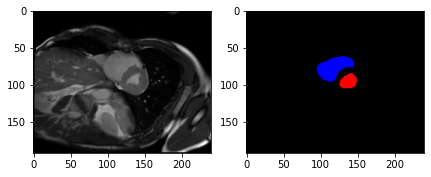

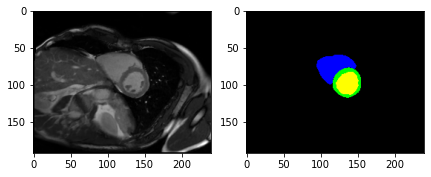

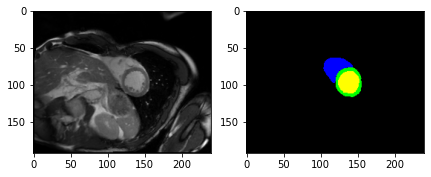

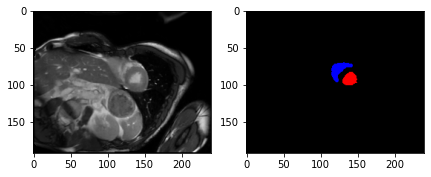

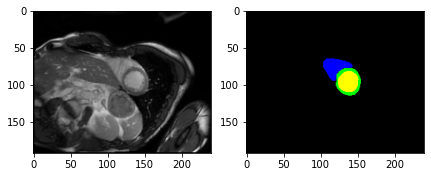

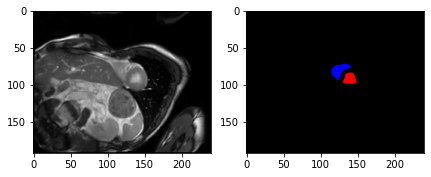

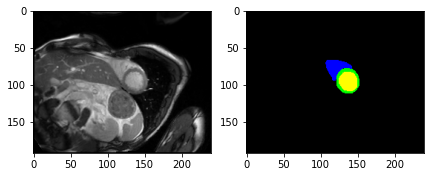

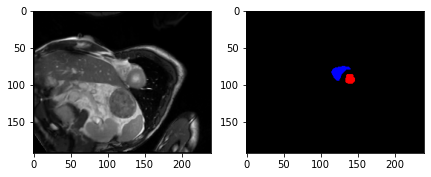

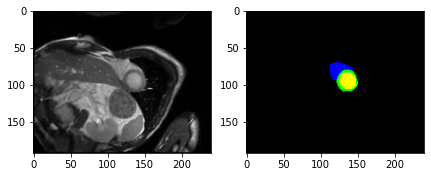

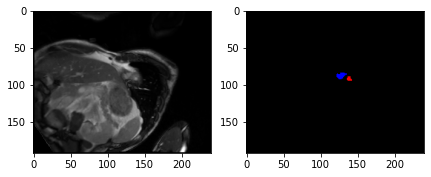

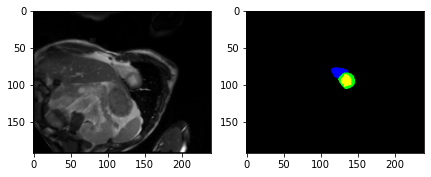

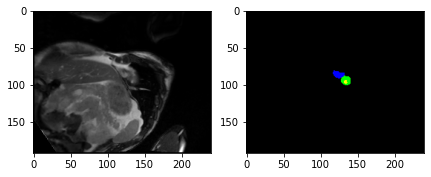

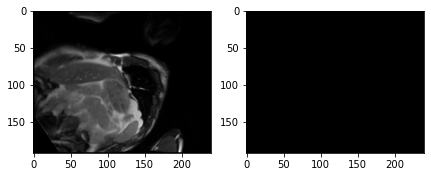

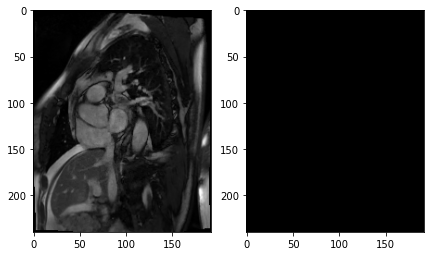

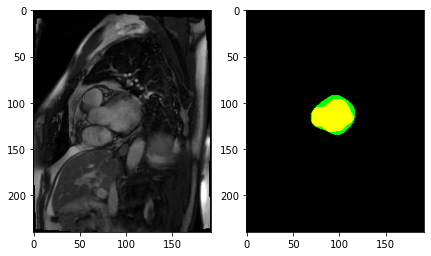

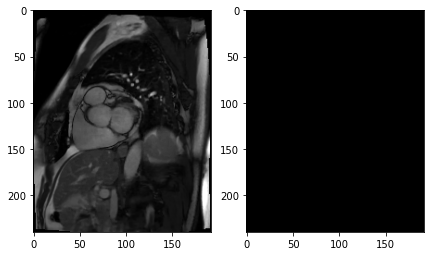

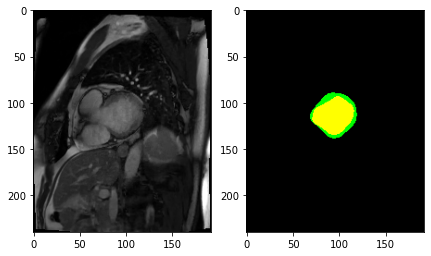

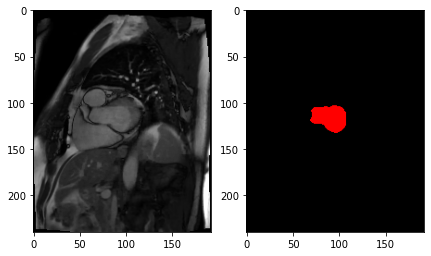

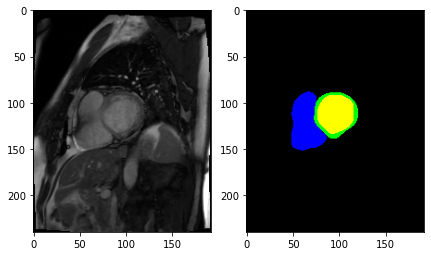

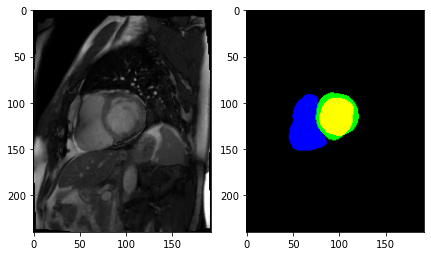

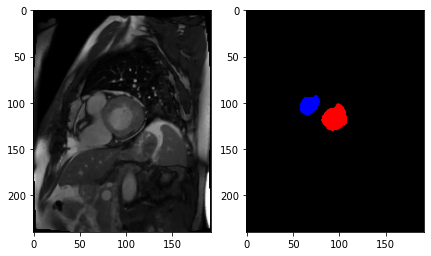

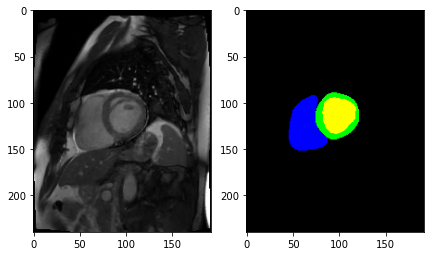

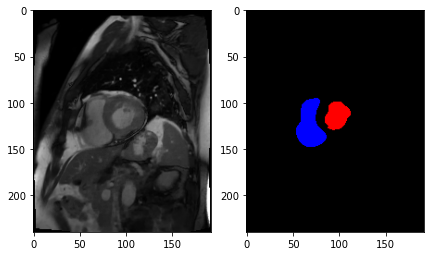

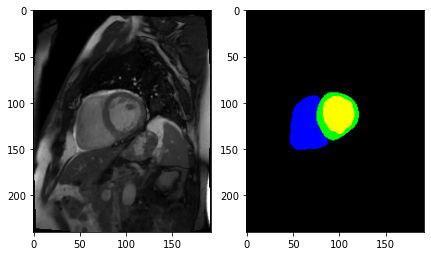

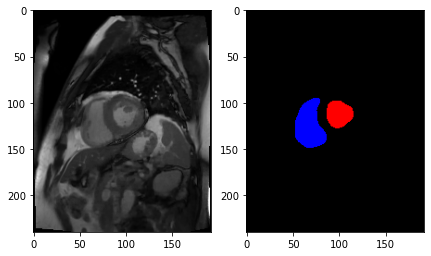

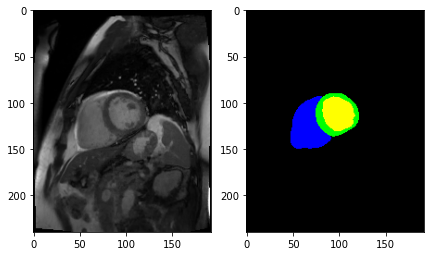

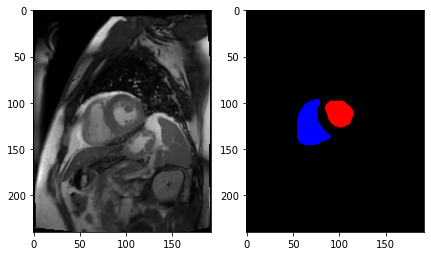

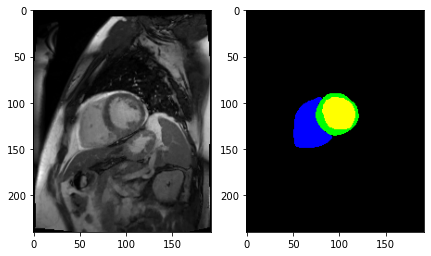

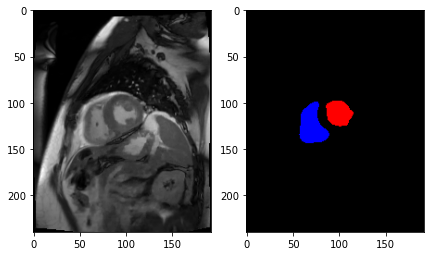

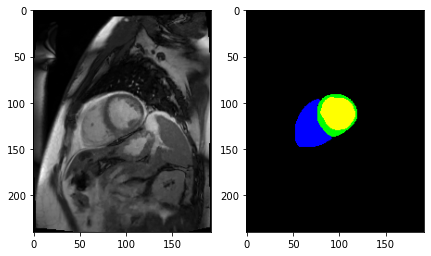

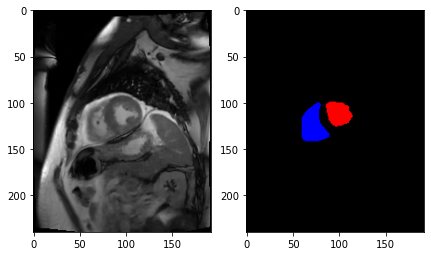

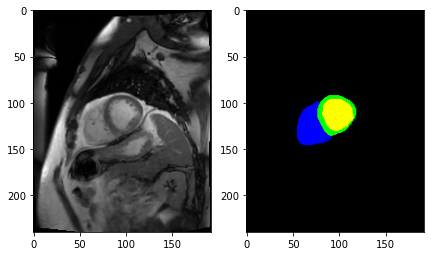

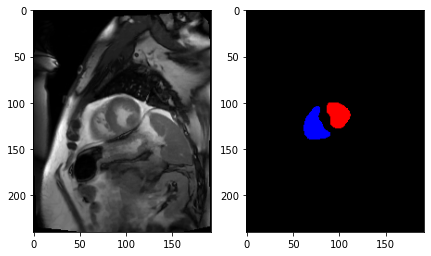

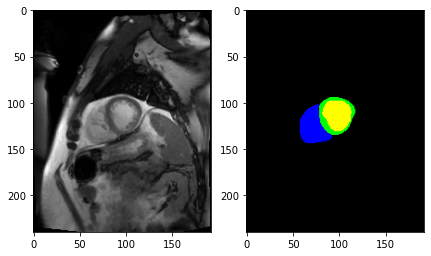

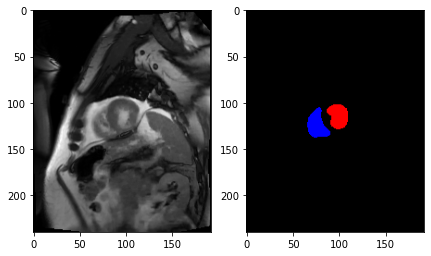

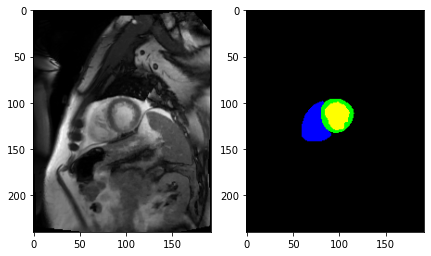

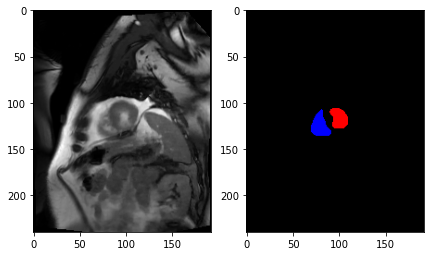

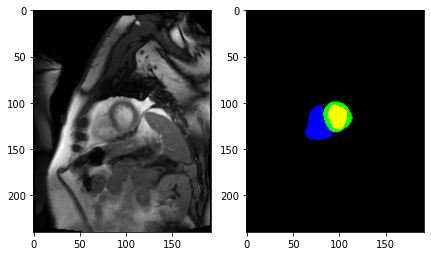

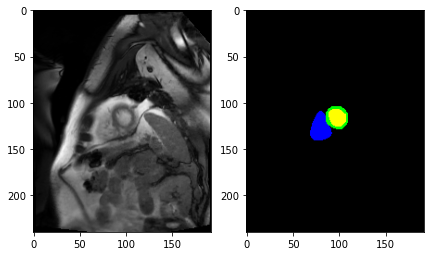

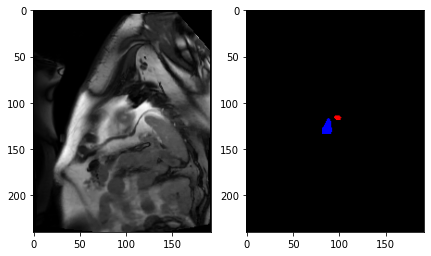

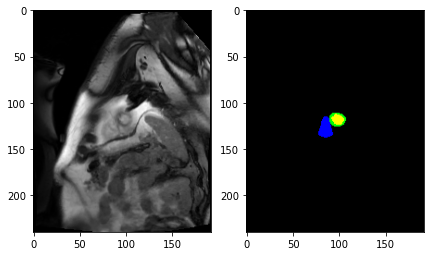

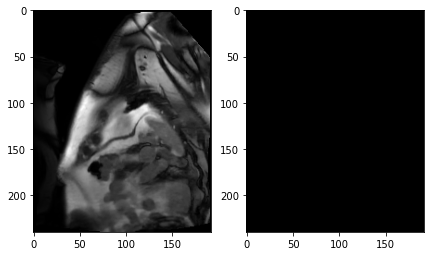

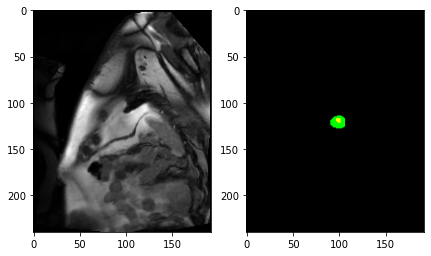

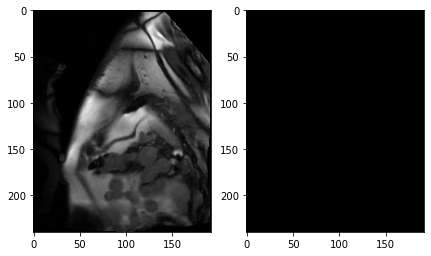

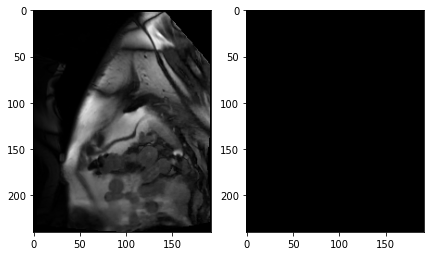

Producing:  106  takes:  25.431654930114746


In [16]:
# load a case
bp = '/Users/dietrichhadler/Desktop/Daten/CS_SAXCINE_Test/data/JGold'
case_paths = [os.path.join(bp,p) for p in os.listdir(bp) if p.endswith('.pickle')]
cases = [pickle.load(open(p, 'rb')) for p in case_paths]

st = time()
nr_imgs_blas = 0
for c in cases:
    es_phase = [cat.phase for cat in c.categories if 'ES' in cat.name][0]
    ed_phase = [cat.phase for cat in c.categories if 'ED' in cat.name][0]
    cat      = c.categories[0]
    for d in range(cat.nr_slices):
        for p in [es_phase, ed_phase]:
            img  = cat.get_img(d, p)
            h, w = img.shape
            anno = cat.get_anno(d, p)
            mask = np.zeros((h,w,3))
            mask[:,:,0] = anno.get_cont_as_mask('lv_endo', h, w)
            mask[:,:,1] = anno.get_cont_as_mask('lv_epi',  h, w)
            mask[:,:,2] = anno.get_cont_as_mask('rv_endo', h, w)
            nr_imgs_blas += 1
            fig, ax = plt.subplots(1, 2, figsize=(7,7))
            ax[0].imshow(img, cmap='gray')
            ax[1].imshow(mask)
            plt.show()
print('Producing: ', nr_imgs_blas, ' takes: ', time()-st)